## 텐서플로 시작하기
- p120

## 상수 텐서와 변수
- 모두 1이거나 0인 텐서를

In [1]:
import tensorflow as tf
x = tf.ones(shape = (2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [2]:
x = tf.zeros(shape = (2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

## 랜덤 텐서

In [3]:
x = tf.random.normal(shape=(3,1) , mean = 0., stddev=1.)
print (x)

tf.Tensor(
[[-0.06445076]
 [-0.11492404]
 [ 1.0899105 ]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3,1), minval = 0., maxval =1.)
print(x)

tf.Tensor(
[[0.11581635]
 [0.7170088 ]
 [0.22898102]], shape=(3, 1), dtype=float32)


## 값 할당

In [5]:
import numpy as np
x = np.ones(shape=(2,2))
x[0,0] = 0.
x

array([[0., 1.],
       [1., 1.]])

In [6]:
# x= tf.ones(shape=2,2)
# x[0,0] = 0. # 할당 할 수 없음

In [7]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.1281033],
       [-1.3706009],
       [-1.4728528]], dtype=float32)>


In [8]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [9]:
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [10]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

텐서 여난 : 텐서플로에서 사칙연산

In [11]:
a = tf.ones((2,2))
b = tf.square(a) # 제곱 계산
c = tf.sqrt(a) # 제곱근 계산
d = b+c # 두 텐서 더하기
e = tf.matmul(a,d)
e *= d
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[8., 8.],
       [8., 8.]], dtype=float32)>

# GradientTape API 살펴보기
- 텐서플로 numpy와 비슷
  + 미분가능하게 만들어줌 (텐서플로 0, numpy X)

In [12]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [13]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [14]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

## 엔드-투-엔드 예제
- 텐서플로 선형 분류기
(수강생 입장 취업에 필요한 내용 126p)



## 2D 평면에 두 클래스 데이터 생성

In [15]:
import numpy as np

num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0, 3], # 데이터를 어느정도로 흩어놓을것이냐
    cov=[[1, 0.5], [0.5, 1]], # 공분산은 방향설정한다는 느낌 데이터 방향이 우상향
    size=num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],  # 데이터 방향이 우상향
    size=num_samples_per_class
)

In [16]:
positive_samples.dtype

dtype('float64')

## 두 데이터 합치기

In [17]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs.shape

(2000, 2)

0과 1로 구성된 타겟 생성

In [18]:
targets = np.vstack((np.zeros((num_samples_per_class,1), dtype="float32"),
                     np.ones((num_samples_per_class,1),dtype="float32")))
targets.shape

(2000, 1)

## 그래프 그려보기

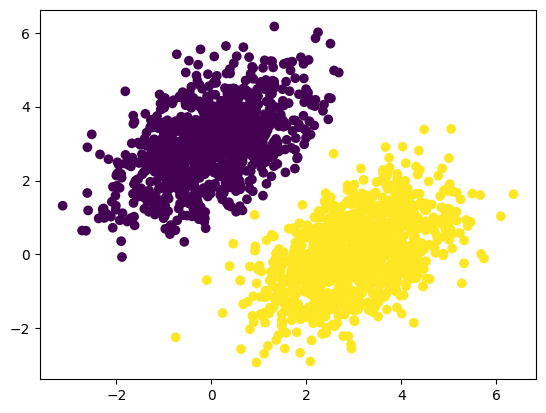

In [19]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

p.127
- 선형 분류기 = prediction = w*input+b


In [20]:
input_dim = 2 # 입력은 2차원 배열
output_dim = 1 # 출력 예측은 하나의 점수, 0에 가까우면 0, 1에 가까우면 1
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim,output_dim))) # 가중치를 랜덤하게 설정
b = tf.Variable(initial_value = tf.zeros(shape = (output_dim,)))

## 정방향 패스 함수

In [21]:
def model (inputs) :
  return tf.matmul(inputs, W) + b

## 평균 제곱 오차 손실 함수

In [22]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions) # 각 샘플의 손실 값을 담고 있다
  return tf.reduce_mean(per_sample_losses) # 샘플당 손실 값으로 하나의 스칼라 손실 값으로 평균

## 훈련 스템 함수
- 순전파 계산 ( = 정방향계산)
- 역전파 계산
- 가중치를 업데이트 = 기울기 변동 = 오차를 감소시키기 위한 목적 (범위는 아직 미지정)

In [23]:
learning_rate =0.1 # step
def training_step(inputs,targets):
  with tf.GradientTape() as tape:
    # with는 여기로 다시 돌아오지 않는한 아래의 코드를 사용하지 않는다
    # 메모리를 효율적으로 쓰기 위해 사용
    # 정방향 계산, 순전파 계산
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  # 역전파 수행 중, 각각의 업데이트 된 기울기(=가중치)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b]) # 역전파 수행 중
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

In [24]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 2.3621
1번째 스텝의 손실: 0.3824
2번째 스텝의 손실: 0.1539
3번째 스텝의 손실: 0.1154
4번째 스텝의 손실: 0.1039
5번째 스텝의 손실: 0.0967
6번째 스텝의 손실: 0.0905
7번째 스텝의 손실: 0.0849
8번째 스텝의 손실: 0.0798
9번째 스텝의 손실: 0.0752
10번째 스텝의 손실: 0.0709
11번째 스텝의 손실: 0.0670
12번째 스텝의 손실: 0.0634
13번째 스텝의 손실: 0.0602
14번째 스텝의 손실: 0.0572
15번째 스텝의 손실: 0.0545
16번째 스텝의 손실: 0.0520
17번째 스텝의 손실: 0.0497
18번째 스텝의 손실: 0.0476
19번째 스텝의 손실: 0.0457
20번째 스텝의 손실: 0.0439
21번째 스텝의 손실: 0.0423
22번째 스텝의 손실: 0.0409
23번째 스텝의 손실: 0.0395
24번째 스텝의 손실: 0.0383
25번째 스텝의 손실: 0.0372
26번째 스텝의 손실: 0.0362
27번째 스텝의 손실: 0.0352
28번째 스텝의 손실: 0.0344
29번째 스텝의 손실: 0.0336
30번째 스텝의 손실: 0.0329
31번째 스텝의 손실: 0.0322
32번째 스텝의 손실: 0.0316
33번째 스텝의 손실: 0.0311
34번째 스텝의 손실: 0.0306
35번째 스텝의 손실: 0.0301
36번째 스텝의 손실: 0.0297
37번째 스텝의 손실: 0.0293
38번째 스텝의 손실: 0.0289
39번째 스텝의 손실: 0.0286


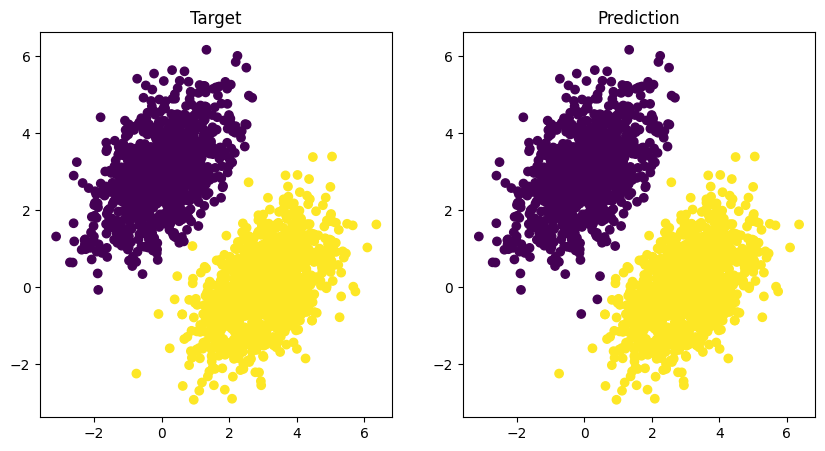

In [25]:
predictions = model(inputs)

fig, ax = plt.subplots(ncols = 2, figsize=(10, 5))

ax[0].scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
ax[0].set_title("Target")
ax[1].scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
ax[1].set_title("Prediction")
plt.show()

## 직선 긋기

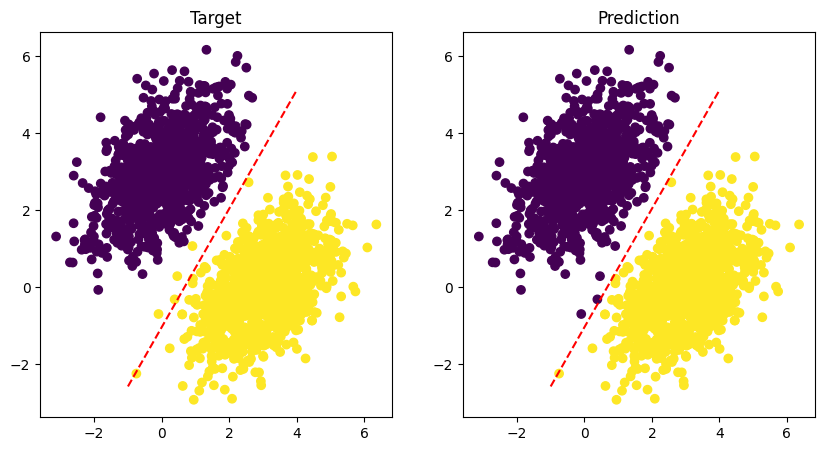

In [26]:
x = np.linspace(-1, 4, 100)
# 사실 100개의 x 축 좌표를 만들 필요 없이 시작과 종료 위치만 있어도 됩니다.
# x = [-1, 4]
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]

fig, ax = plt.subplots(ncols = 2, figsize=(10, 5))

ax[0].scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
ax[0].set_title("Target")
ax[0].plot(x, y, '--r')
ax[1].scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
ax[1].set_title("Prediction")
ax[1].plot(x, y, '--r')
plt.show()

# 영화 리뷰 분류 : 이진 분류 문제
- p.147

In [27]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

In [28]:
train_data[0][:3] # 형태소 분석, 텍스트 마이닝 할 때 나오는 숫자 개념

[1, 14, 22]

In [29]:
train_labels[0] # 부정적인 문장 0, 긍정적인 문장 1

1

In [30]:
max([max(sequence) for sequence in train_data]) # 가장 자주 등장하는 단어 1만개로 제한

9999

In [31]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key, value) in word_index.items()])
decoded_review = "".join(
    [reverse_word_index.get(i-3,"?") for i in train_data[0]]
)
decoded_review

"?thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert?isanamazingactorandnowthesamebeingdirector?fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor?andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso?tothetwolittleboy'sthatplayedthe?ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe?listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall"

## 정수 시퀀스를 멀티-핫 인코딩으로 인코딩
- p.149
  + 텍스트 데이터는 , 문장 길이가 다 달라서, 바로 행렬로 변환이 어렵다
    + 방법1 : 같은 길이가 되도록 리스트에 패딩 0을 추가
    + 방법2 : 멸티- 핫 인코딩, 0과 1의 벡터로 변환 (매칭되면 1 안되면 0)

In [32]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [33]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [34]:
len(x_train[0]), len(x_train[1])

(10000, 10000)

In [35]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [36]:
x_train.shape

(25000, 10000)

In [37]:
x_test.shape

(25000, 10000)

## y 값 벡터 변환

In [38]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## 신경망 모델 만들
_ Dense 층을 쌓기
  + 얼마나 많은 층을 상용할 것인가?
  + 각층에 얼마나 많은 은닉층을 사용할 것인가?
  + 얼마나 많은 unit

In [39]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# 모델 컴파일 하기
model.compile(
    optimizer="rmsprop", # SGD 확률적 경사하강법 쓰다 다른게 개발된 것
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

## 훈련 검증

In [40]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## 모델 훈련

In [41]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 6s 103ms/step - loss: 0.5577 - accuracy: 0.7763 - val_loss: 0.4650 - val_accuracy: 0.8182
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3685 - accuracy: 0.8871 - val_loss: 0.3416 - val_accuracy: 0.8837
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2744 - accuracy: 0.9143 - val_loss: 0.3110 - val_accuracy: 0.8779
Epoch 4/20
30/30 [==============================] - 1s 50ms/step - loss: 0.2198 - accuracy: 0.9298 - val_loss: 0.3156 - val_accuracy: 0.8703
Epoch 5/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1828 - accuracy: 0.9411 - val_loss: 0.2762 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1544 - accuracy: 0.9511 - val_loss: 0.3145 - val_accuracy: 0.8734
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1342 - accuracy: 0.9588 - val_loss: 0.2872 - val_accuracy: 0.8844
Epoch 8/20
3

In [42]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## 훈련과 검증 손실 그리기
- 해당 코드 함수화 할것
  + 미니과제

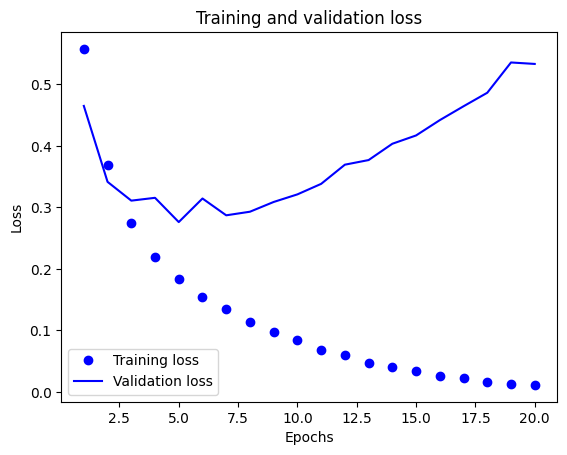

In [43]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

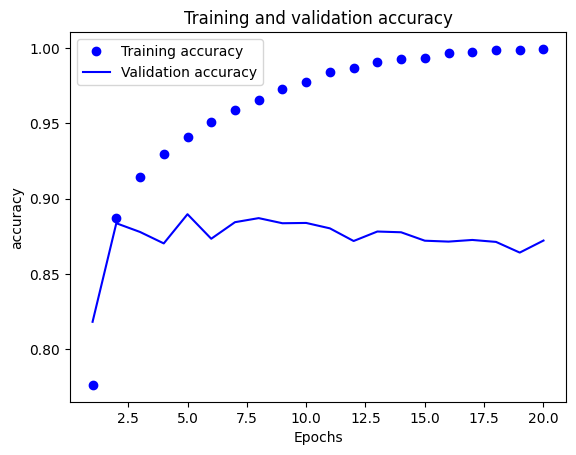

In [44]:
import matplotlib.pyplot as plt
history_dict = history.history
accuracy_values = history_dict["accuracy"]
val_accuracy_values = history_dict["val_accuracy"]
epochs = range(1, len(accuracy_values) + 1)
plt.plot(epochs, accuracy_values, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy_values, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

# 뉴스 기사 분류 : 다중분류 문제
- p.160 , 1986년 로이터 데이터셋
- 46개의 토픽 존재
- 10개의 심플 존

In [45]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_Data, test_labels) = reuters.load_data(num_words=10000)

In [46]:
len(train_data)

8982

In [47]:
len(test_data)

25000

In [48]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

## 디코딩

In [49]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key, value) in word_index.items()])
decoded_newswire = "".join(
    [reverse_word_index.get(i-3,"?") for i in train_data[0]]
)
decoded_newswire

'???saidasaresultofitsdecemberacquisitionofspacecoitexpectsearningspersharein1987of115to130dlrspershareupfrom70ctsin1986thecompanysaidpretaxnetshouldrisetonineto10mlndlrsfromsixmlndlrsin1986andrentaloperationrevenuesto19to22mlndlrsfrom125mlndlrsitsaidcashflowpersharethisyearshouldbe250tothreedlrsreuter3'

In [50]:
train_labels[10] # 토픽의 인덱스가 0~45 사이 점수

3

## 인코딩
- (비유적) 독립변수 전체를 벡터 변환

In [51]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

- (비유) 종속변수 전체 인코딩 ==> 범주형 인코

In [52]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [53]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical (train_labels)
y_test =to_categorical(test_labels)

## 모델 만들기

In [54]:
from tensorflow import keras
from tensorflow.keras import layers

"""
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid") # 이진분류 (출력노드)
])
"""

model = keras.Sequential([
    layers.Dense(64, activation="relu"), # 64입력치는 변동가능 2의 제곱승으로
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax") # 3개이상 분류로 넘어가면 softmax (출력노드)
])

# 모델 컴파일하기 (p.163)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              # loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 검증 세트 준비하기

In [69]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

### 모델 훈련하기

In [56]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 35ms/step - loss: 2.7123 - accuracy: 0.4577 - val_loss: 1.8010 - val_accuracy: 0.6270
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.5135 - accuracy: 0.6809 - val_loss: 1.3742 - val_accuracy: 0.6930
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.1700 - accuracy: 0.7414 - val_loss: 1.1938 - val_accuracy: 0.7300
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.9599 - accuracy: 0.7915 - val_loss: 1.0974 - val_accuracy: 0.7480
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8012 - accuracy: 0.8282 - val_loss: 1.0182 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6699 - accuracy: 0.8567 - val_loss: 0.9624 - val_accuracy: 0.7970
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5628 - accuracy: 0.8781 - val_loss: 0.9164 - val_accuracy: 0.8070
Epoch 8/20
16

In [70]:
value = 1000
epochs = 20
batch_size = 512

def mk_history(value,epochs,batch_size):
  x_val = x_train[:value]
  partial_x_train = x_train[value:]
  y_val = y_train[:value]
  partial_y_train = y_train[value:]

  history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_val,y_val))

In [72]:
mk_history(1000,20,512)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
16/16 [==============================] - 1s 49ms/step - loss: 0.1446 - accuracy: 0.9544 - val_loss: 0.9784 - val_accuracy: 0.8090
Epoch 2/20
16/16 [==============================] - 1s 43ms/step - loss: 0.1226 - accuracy: 0.9574 - val_loss: 0.9494 - val_accuracy: 0.8120
Epoch 3/20
16/16 [==============================] - 1s 41ms/step - loss: 0.1218 - accuracy: 0.9565 - val_loss: 1.0708 - val_accuracy: 0.7980
Epoch 4/20
16/16 [==============================] - 1s 42ms/step - loss: 0.1210 - accuracy: 0.9570 - val_loss: 0.9692 - val_accuracy: 0.8180
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.1134 - accuracy: 0.9562 - val_loss: 0.9767 - val_accuracy: 0.8230
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.1124 - accuracy: 0.9589 - val_loss: 1.0163 - val_accuracy: 0.8180
Epoch 7/20
16/16 [==============================] - 1s 43ms/step - loss: 0.1071 - accuracy: 0.9572 - val_loss: 0.9880 - val_accuracy: 0.8150
Epoch 8/20
16

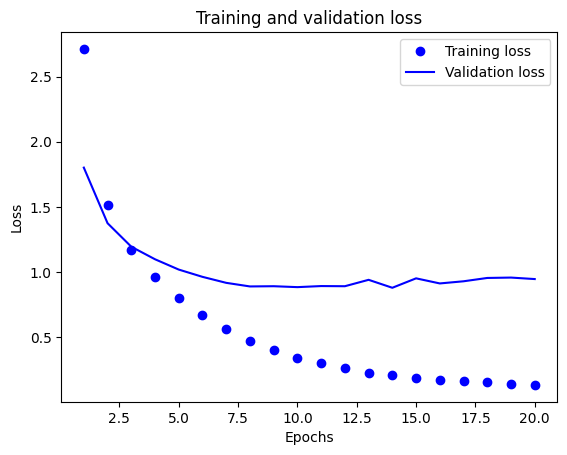

In [57]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

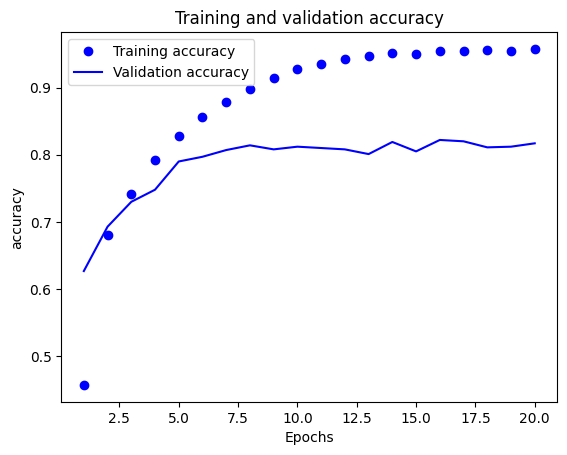

In [58]:
import matplotlib.pyplot as plt
history_dict = history.history
accuracy_values = history_dict["accuracy"]
val_accuracy_values = history_dict["val_accuracy"]
epochs = range(1, len(accuracy_values) + 1)
plt.plot(epochs, accuracy_values, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy_values, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [73]:
import matplotlib.pyplot as plt

def train_hist_plot(history, metric='loss'):
    history_dict = history.history

    if metric == 'loss':
        values = history_dict['loss']
        val_values = history_dict['val_loss']
        title = "Training and Validation Loss"
        ylabel = "Loss"
    elif metric == 'accuracy':
        values = history_dict['accuracy']
        val_values = history_dict['val_accuracy']
        title = "Training and Validation Accuracy"
        ylabel = "Accuracy"
    else:
        print("metric을 다시 입력해 주세요")
        return

    epochs = range(1, len(values) + 1)
    plt.plot(epochs, values, "bo", label=f"Training {metric}")
    plt.plot(epochs, val_values, "b", label=f"Validation {metric}")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

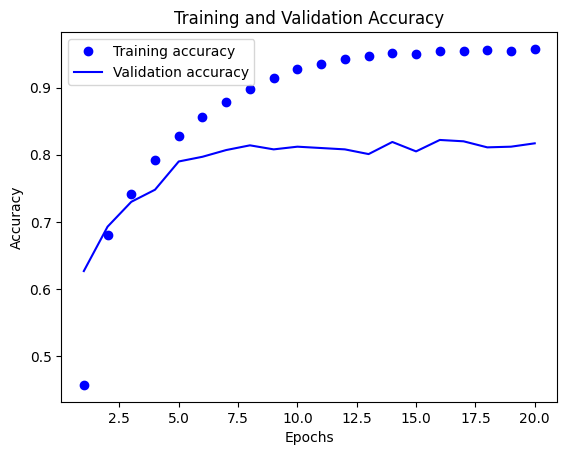

In [74]:
train_hist_plot(history,metric = 'accuracy')

In [61]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [62]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

In [63]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [64]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/9


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


ValueError: ignored

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"), # 64입력치는 변동가능 2의 제곱승으로
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax") # 3개이상 분류로 넘어가면 softmax (출력노드)
])

# 모델 컴파일하기 (p.163)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test,y_test)
results

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

## 예측



In [ ]:
predictions = model.predict(x_test)
predictions[0].shape

In [ ]:
np.sum(predictions[0])

In [ ]:
np.argmax(predictions[0])

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

In [ ]:
from keras.utils import to_categorical

partial_y_train = to_categorical(partial_y_train)
y_val = to_categorical(y_val)

model = keras.Sequential([
    layers.Dense(64, activation="relu"), # 64입력치는 변동가능 2의 제곱승으로
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax") # 3개이상 분류로 넘어가면 softmax (출력노드)
])

# 모델 컴파일하기 (p.163)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val,y_val))

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"), # 64입력치는 변동가능 2의 제곱승으로
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax") # 3개이상 분류로 넘어가면 softmax (출력노드)
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val,y_val))

results = model.evaluate(x_test,y_test)
results

In [ ]:
print(x_test.shape)
print(y_test.shape)

In [ ]:
p = ((123,12),(123,123))
import numpy as np

p_array = np.array(p)
print(p_array.ndim)

In [ ]:
p.ndim()

# 주택 가격 예측 : 회귀 문제
- 1970년 중반 보스턴 외곽지역의 범죄율
- 각 특성

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
train_data.shape

In [ ]:
test_data.shape

In [ ]:
train_targets # 개별적인 수치 데이터

## 데이터 준비
- 정규화 하기 : 상이한 스케일을 가진 값을 신경망에 주입하면 문제가 됨
- 질문 : 왜 테스트 데이터에 train의 평균과 표준편차를 적용했는가?
- Data Leakage 반드시 공부!!
  + 훈련데이터/ 검증데이터 / 테스트 데이터 의미만 잘 기억!

In [ ]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data -= mean
train_data /= std
test_data -=mean
test_data/=std

## 모델 구성
- 샘플개수가 적기 때문에 2개의 중간

In [ ]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(1) # 수치 데이터 하나만 예측
  ])
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print(f'#{i+1} 번째 폴드 처리중')
  # print(i * num_val_samples, (i+1) * num_val_samples)
  val_data = train_data[i * num_val_samples:(i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples:(i+1) * num_val_samples]
  # print(f"0:{i*num_val_samples}", f"{(i+1) * num_val_samples}:404")
  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples], train_data[(i+1) * num_val_samples:]],
      axis=0
  )
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples], train_targets[(i+1) * num_val_samples:]],
      axis=0
  )
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size=16, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

all_scores

In [ ]:
np.mean(all_scores)

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [ ]:
def mk_history(partial_x_train, partial_y_train, x_val, y_val, model, epochs=20, batch_size=512):
    history = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val,y_val))